
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Hollywood_Sign_%28Zuschnitt%29.jpg/1920px-Hollywood_Sign_%28Zuschnitt%29.jpg>

<h3>Movie revenue prediction</h3>

<h3>Goal:</h3>
<p>Use Linear Regression to predict revenue with a budget. </p>

Import Statements

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor
from sklearn.linear_model import LinearRegression

Notebook Presentation

In [167]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Read the Data

In [168]:
data = pd.read_csv('cost_revenue_dirty.csv')

Explore and Clean the Data

In [169]:
data.shape

(5391, 6)

In [170]:
data.isnull().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [171]:
data.duplicated().any()

False

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


Converting USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing $ signs and ,.

In [173]:

data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace("$", "")
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace(",", "")
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])

In [174]:
char_to_rem = ['$', ',']
column_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in column_to_clean:
  for char in char_to_rem:
    data[col] = data[col].astype(str).str.replace(char, "")
  data[col] = pd.to_numeric(data[col])




Converting the Release_Date column to a Pandas Datetime type.

In [175]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [177]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


Descriptive Statistics

In [178]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


Investigating the Zero Revenue Films

In [179]:
zero_gross = data[data.USD_Domestic_Gross == 0]
zero_gross.sort_values(by=['USD_Production_Budget'], ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [180]:
zero_gross.count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

International releases that had some worldwide gross revenue, but made zero revenue in the United States.

In [181]:
zero_US = data[data.USD_Domestic_Gross == 0]
zero_US.query('USD_Worldwide_Gross > 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


Unreleased Films

In [182]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [183]:
fut_rel = data[data.Release_Date >= scrape_date]
print(f'Unreleased films : {len(fut_rel)}')

Unreleased films : 7


Films that Lost Money

In [184]:
data_clean = data.drop(fut_rel.index)

In [185]:
film_lost_money = data_clean.query('USD_Worldwide_Gross < USD_Production_Budget')
film_lost_money.shape[0]/data_clean.shape[0]

0.37277117384843983

Revenues against film costs

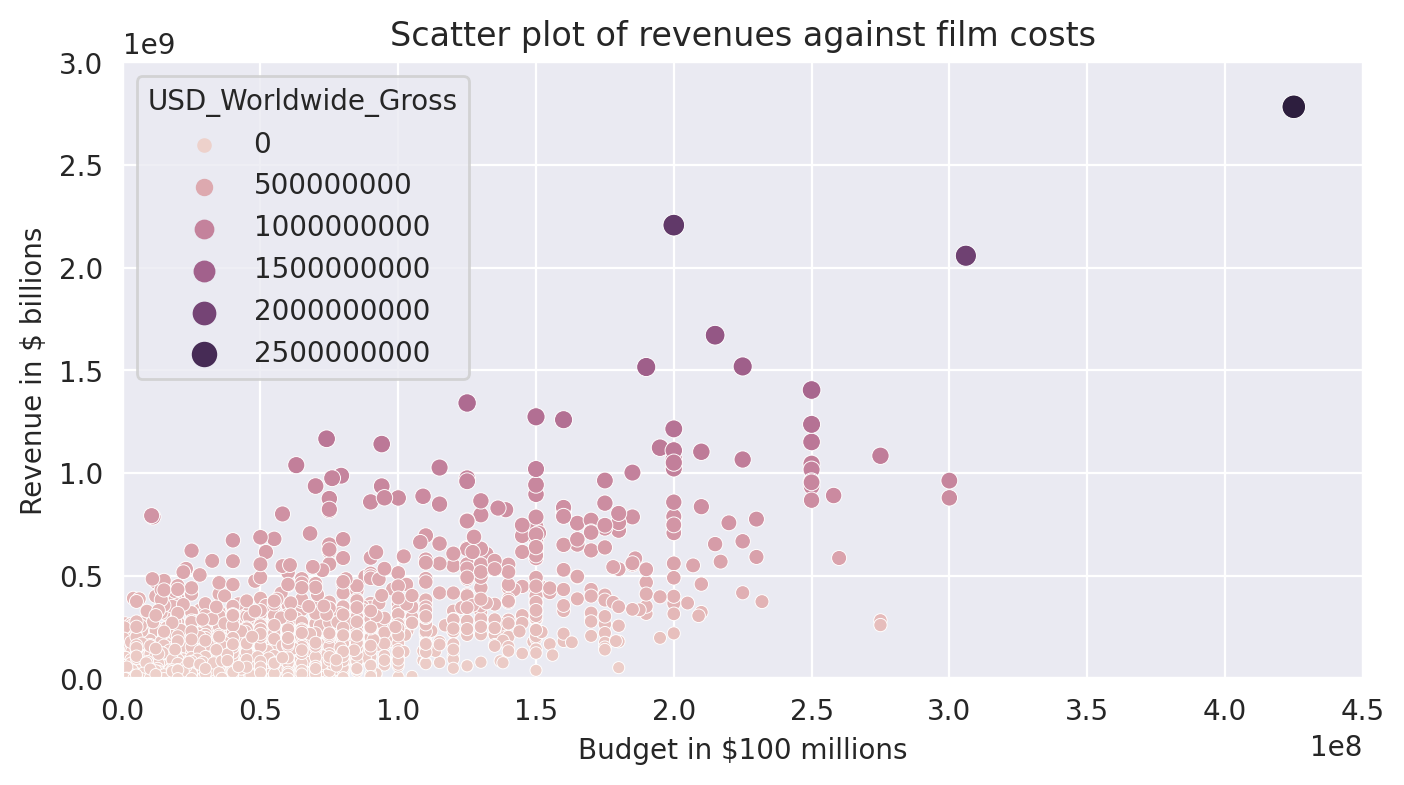

In [186]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                  x='USD_Production_Budget',
                  y='USD_Worldwide_Gross',
                  hue='USD_Worldwide_Gross',
                  size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',
        title="Scatter plot of revenues against film costs")
plt.show()

Plotting Movie Releases over Time

In [187]:
data_clean['Release_Date'].describe()

count                             5384
mean     2003-09-12 00:26:12.659732480
min                1915-08-02 00:00:00
25%                1999-12-02 00:00:00
50%                2006-06-16 00:00:00
75%                2011-11-18 00:00:00
max                2017-12-31 00:00:00
Name: Release_Date, dtype: object

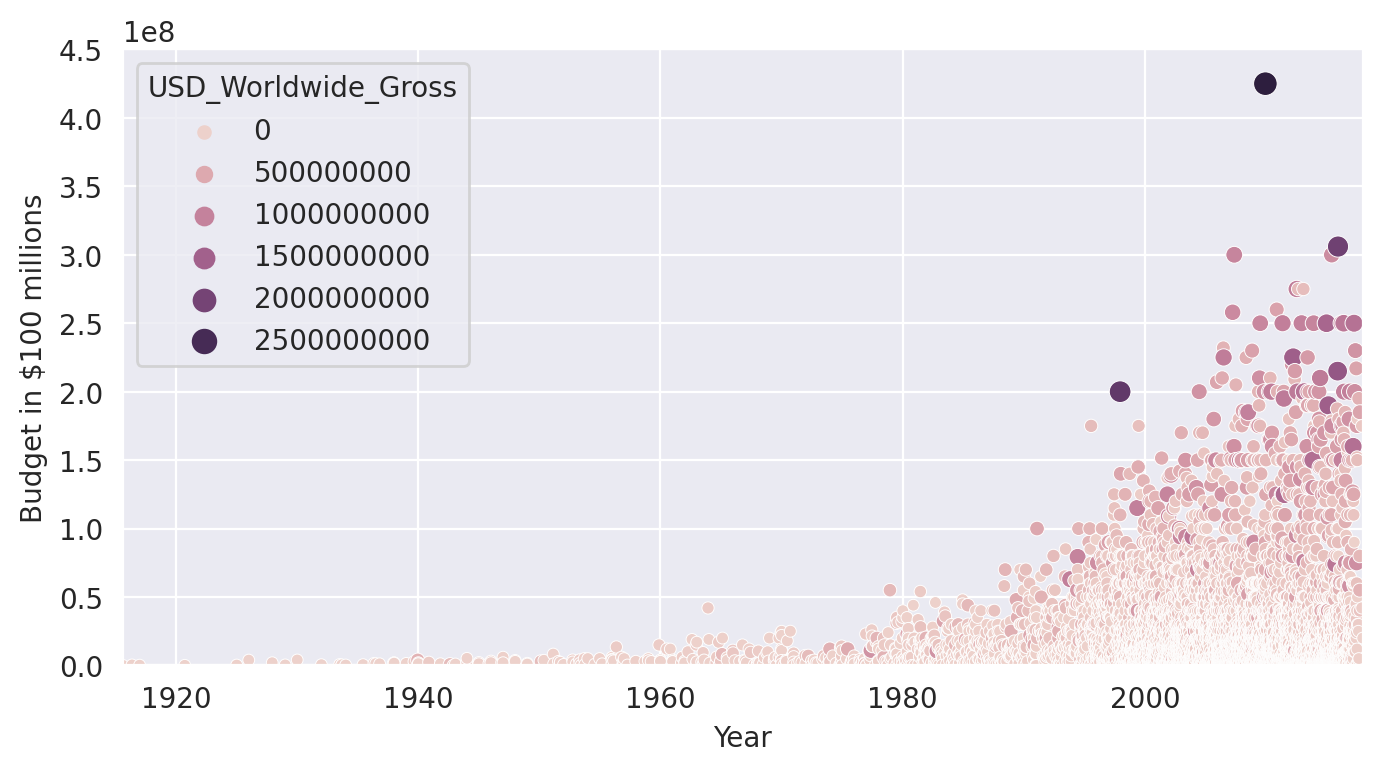

In [188]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                  x='Release_Date',
                  y='USD_Production_Budget',
                  hue='USD_Worldwide_Gross', # colour
                  size='USD_Worldwide_Gross') # dot size

  ax.set(ylim=(0, 450000000),
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        ylabel='Budget in $100 millions',
        xlabel='Year')
plt.show()

Converting Years to Decades

In [189]:
data_timeindex = pd.DatetimeIndex(data_clean['Release_Date'])
years = data_timeindex.year
decades = years//10*10
data_clean['Decade'] = decades

In [190]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


Separate the "old" (before 1969) and "New" (1970s onwards) Films

In [191]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


Seaborn Regression Plots

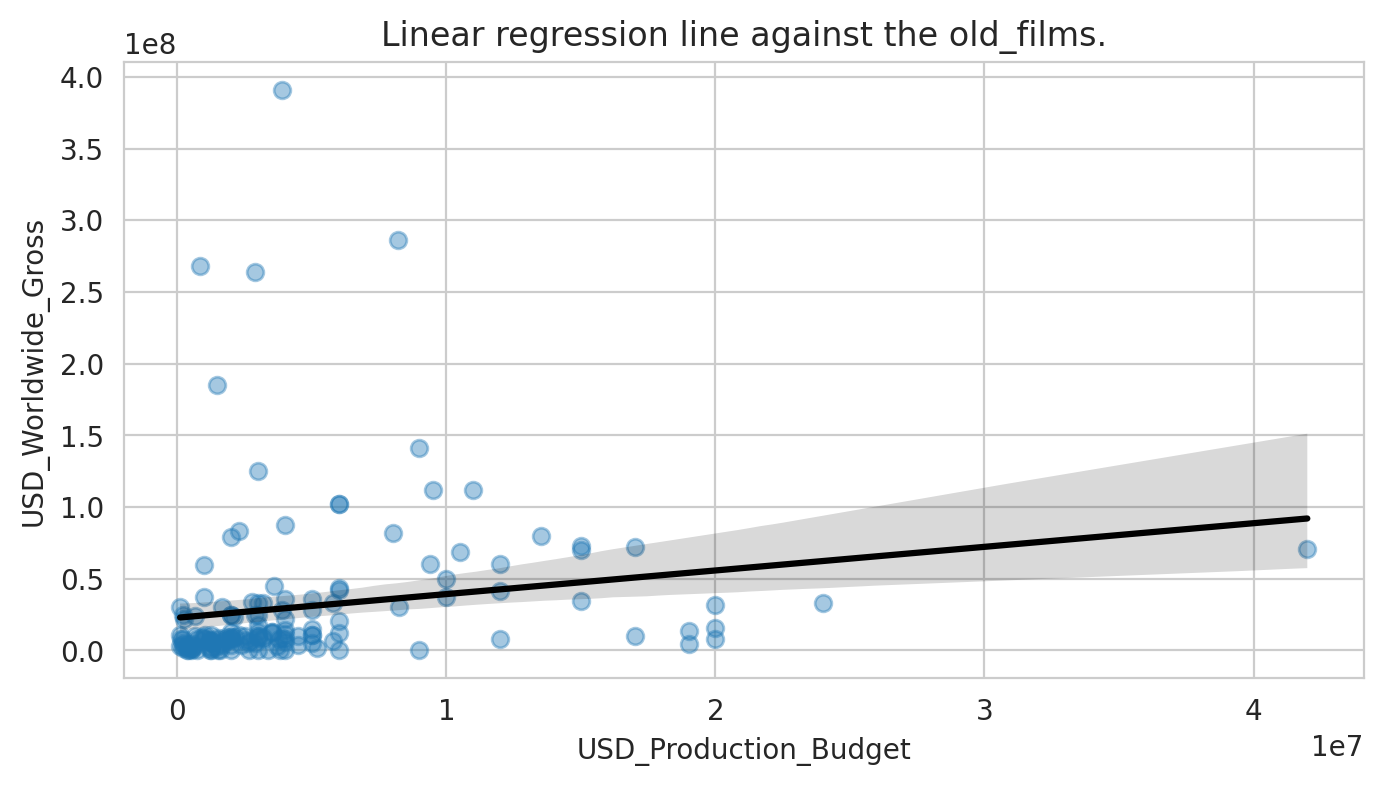

In [192]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'},
  ).set(title="Linear regression line against the old_films.")

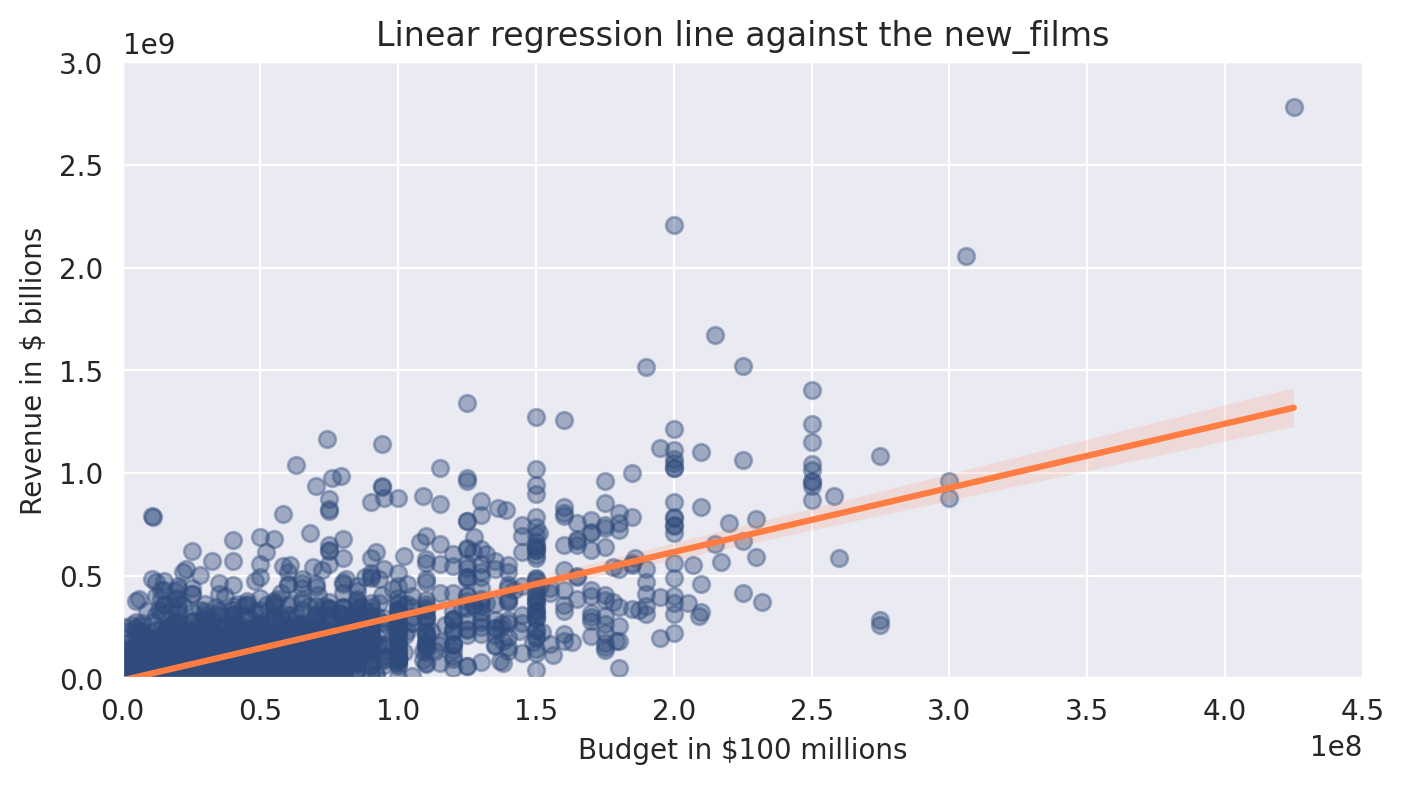

In [193]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            color="#2f4b7c",
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',
        title="Linear regression line against the new_films")
plt.show()

In [194]:
regression = LinearRegression()

In [195]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [196]:
type(X)

pandas.core.frame.DataFrame

Determine the values of the coefficients a and b in the equation y = ax + b of the regressor

In [197]:
regression.fit(X, y)

LinearRegression()

In [198]:
regression.score(X, y)

0.5577032617720403

In [199]:
reg_int = regression.intercept_.astype(int)
reg_int


array([-8650768])

In [200]:
reg_cof = regression.coef_.astype(int)
reg_cof

array([[3]])

 How much global revenue does our model estimate for a film with a budget of $350 million?

In [202]:
revenue = reg_int + reg_cof*350000000
revenue = revenue.item()
print("Our model estimate ${:,.2f} revenue!".format(revenue))

Our model estimate $1,041,349,232.00 revenue!
